<a href="https://colab.research.google.com/github/Mahdi-Saadati/Connecting-Google-Colab-to-webcam-/blob/main/1.%20Connect%20Google%20Cloud%20to%20webcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Python code to connect Google Cloud to webcam
<div dir="rtl" align="right">

کد پایتون برای اتصال گوگل کولب به وبکم

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from IPython.display import Image
import cv2
import numpy as np
import PIL.Image

# تابع گرفتن تصویر از وبکم با جاوااسکریپت
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📸 Take Photo';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Wait for the button to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();

      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b''.join([bytes([c]) for c in bytearray(data.split(',')[1], 'utf-8')])
  with open(filename, 'wb') as f:
    f.write(base64.b64decode(data.split(',')[1]))
  return filename


<IPython.core.display.Javascript object>

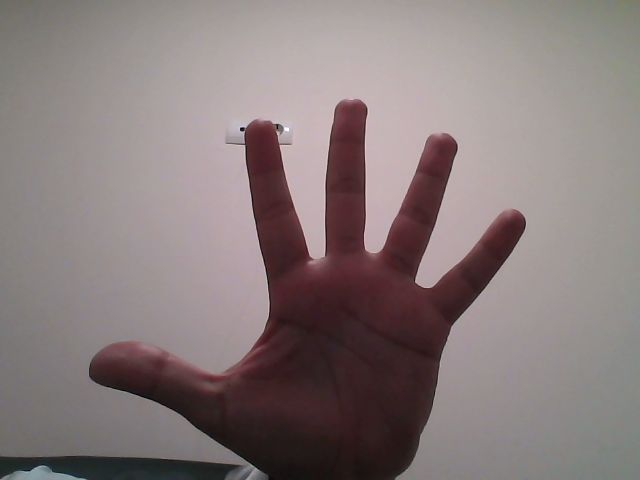

In [6]:
import base64
from io import BytesIO
from IPython.display import Image, display

# گرفتن عکس
filename = take_photo()

# نمایش عکس با OpenCV
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(PIL.Image.fromarray(img))
